<a href="https://colab.research.google.com/github/ChJazhiel/DS_Algorithms/blob/master/First_attempt_Miguel_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
# Import data

df = pd.read_csv("miguel_modify_20_features.csv")
df

,Length,Width,Asym,M3Long,TimeSpread,TimeSpreadWeighted,SlopeSpread,SlopeSpreadWeighted,DCA,Dist,CosDeltaAlpha,SizeSubIslands,SizeMainInsland,NewLeakage1,NewConc,NewConc1,NewConcCore,NewUsedArea,Impact,Logsize,True
0,10.44320,9.29697,-5.87372,-10.48690,1.664740,1.425370,1.532610,1.309110,-35.00150,40.1537,-0.490058,0.0000,37.8477,0.058387,0.743810,0.581174,0.782253,1551.920,13802.70,1.607916,4.486042
1,4.74631,3.18266,-1.45763,-6.10007,1.111520,0.442723,0.805741,0.652231,33.49780,43.5865,-0.639807,0.0000,125.6640,0.100155,0.944980,0.863413,0.863413,1108.510,4419.78,2.099211,4.116933
2,6.76659,6.50526,-1.19830,-6.06509,0.608639,0.475323,0.603818,0.464650,49.92960,52.5991,0.314529,0.0000,105.9610,0.664971,0.788616,0.574504,0.788616,1108.510,8285.64,2.025146,4.251256
3,12.40870,6.97741,-4.66437,-13.17790,3.772980,2.730540,1.551870,1.546870,-14.24490,22.8976,0.782927,45.1641,327.3630,0.000000,0.582568,0.293944,0.830625,2217.020,7071.69,2.575098,4.830220
4,6.98661,4.48006,-5.37853,-5.94137,1.260420,0.945155,1.171300,0.803357,7.51208,53.1855,-0.989975,0.0000,34.1250,0.384615,0.875458,0.615385,0.875458,665.107,22810.40,1.533073,4.970755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169047,10.05350,6.11445,9.61214,8.44527,1.817400,1.971930,1.586030,1.484800,-43.90140,49.9379,-0.476601,27.6250,285.4430,0.417366,0.702722,0.352160,0.702722,1773.620,7146.41,2.495639,4.916757
169048,9.89267,8.82349,11.80930,8.34744,0.867144,0.664227,0.764602,0.503860,-28.76320,35.6915,-0.592076,0.0000,408.4490,0.027519,0.534338,0.267475,0.779167,2882.130,2219.41,2.611138,4.059567
169049,8.82443,2.80967,6.45112,8.39534,1.556400,1.272150,0.021106,0.019570,22.57880,36.3530,0.783731,0.0000,34.4375,0.065336,0.934664,0.631579,0.934664,665.107,13519.20,1.537032,4.465964
169050,6.68035,3.22552,1.23685,5.71433,1.192570,0.993127,1.162530,1.029580,-24.34120,26.6308,0.405658,0.0000,51.4326,0.000000,0.917820,0.768189,0.768189,665.107,11830.10,1.724660,4.521632


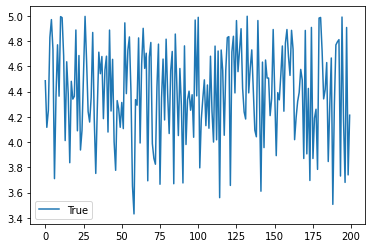

In [3]:
df.head(200).plot(y='True', use_index=True)

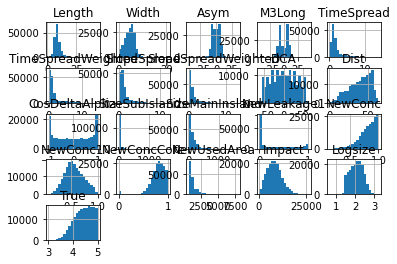

In [ ]:
#hist = df.hist(bins=20)

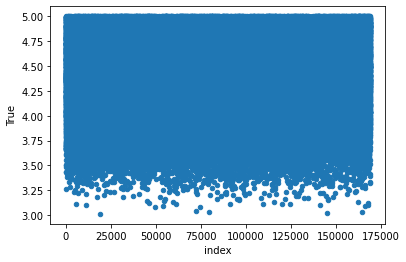

In [4]:
#PLotting the True energy 

df.reset_index().plot.scatter(x='index', y = 'True') 

#energy_plot = df.plot.scatter(x='index', y="True", use_index = True)
#energy_plot

<AxesSubplot:>

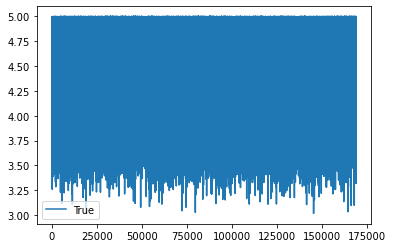

In [ ]:
energy_plot = df.plot(y="True", use_index = True)
energy_plot

In [5]:
print(df.columns.to_list())

['Length', 'Width', 'Asym', 'M3Long', 'TimeSpread', 'TimeSpreadWeighted', 'SlopeSpread', 'SlopeSpreadWeighted', 'DCA', 'Dist', 'CosDeltaAlpha', 'SizeSubIslands', 'SizeMainInsland', 'NewLeakage1', 'NewConc', 'NewConc1', 'NewConcCore', 'NewUsedArea', 'Impact', 'Logsize', 'True']


In [ ]:
#We want to get true energy values as close as the dataframe, our best use would be something 
#with linear or polynomial regression, since these are numerical and not categorical values

## GENERAL APPROACH TO REGRESSION
1. Collect: Any method.
2. Prepare: We’ll need numeric values for regression. Nominal values should be mapped to binary values.
3. Analyze: It’s helpful to visualized 2D plots. Also, we can visualize the regression weights if we apply shrinkage methods.
4. Train: Find the regression weights.
5. Test: We can measure the R2, or correlation of the predicted value and data, to measure the success of our models.
6. Use: With regression, we can forecast a numeric value for a number of inputs. This is an improvement over classification because we’re predicting a continuous value rather than a discrete category.

In [6]:
df.describe()

,Length,Width,Asym,M3Long,TimeSpread,TimeSpreadWeighted,SlopeSpread,SlopeSpreadWeighted,DCA,Dist,CosDeltaAlpha,SizeSubIslands,SizeMainInsland,NewLeakage1,NewConc,NewConc1,NewConcCore,NewUsedArea,Impact,Logsize,True
count,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000,169052.000000
mean,8.781952,4.666108,0.005793,0.049449,2.043103,1.741175,1.353339,1.152459,0.014338,39.603903,0.002257,16.633839,136.977669,0.286112,0.812246,0.556009,0.798040,1202.940735,8155.591114,2.055831,4.423330
std,2.567341,2.174709,5.898182,8.270026,2.047354,2.126808,1.425847,1.465433,31.776548,13.947696,0.679214,41.907694,115.191155,0.350065,0.143434,0.177846,0.148419,657.987881,3950.745577,0.343470,0.365773
min,0.943674,0.000000,-43.023300,-44.361300,0.001519,0.000251,0.000059,0.000000,-63.409600,0.014401,-1.000000,0.000000,25.002000,0.000000,0.134207,0.067179,0.000000,665.107000,46.435500,0.639425,3.013120
25%,7.179258,3.174295,-4.910125,-6.640915,0.864029,0.530474,0.499428,0.326535,-26.475250,29.553825,-0.643088,0.000000,52.741700,0.000000,0.729826,0.429556,0.729609,665.107000,5243.187500,1.783826,4.158876
50%,8.178680,4.808505,0.034514,0.951764,1.331665,0.951745,0.914459,0.639725,0.000000,41.901600,0.004249,0.000000,105.048000,0.066838,0.840140,0.541582,0.816792,1108.510000,7955.870000,2.069783,4.455992
75%,10.022425,6.140623,4.899497,6.680580,2.175250,1.752947,1.534048,1.256352,26.540275,51.369900,0.649174,25.747225,183.492250,0.575211,0.928083,0.679457,0.898411,1330.210000,10653.125000,2.318983,4.729473
max,43.375100,20.673600,34.800400,43.938600,13.788600,14.700400,11.935000,13.163600,63.587000,63.915700,1.000000,1609.450000,1634.060000,1.000000,1.000000,0.997418,1.000000,7981.290000,26054.500000,3.220043,4.999972


In [7]:
## We're gonna randomize the dataset in order to avoid bias
# We're not gonna use the listed data although I don't see any advantage

shuffled_df = df.sample(frac = 1.0) 
#shuffle_df.insert(10, "Model", ['LC','SF']*14300, True)
shuffled_df

,Length,Width,Asym,M3Long,TimeSpread,TimeSpreadWeighted,SlopeSpread,SlopeSpreadWeighted,DCA,Dist,CosDeltaAlpha,SizeSubIslands,SizeMainInsland,NewLeakage1,NewConc,NewConc1,NewConcCore,NewUsedArea,Impact,Logsize,True
101101,6.52238,3.848570,4.085070,6.61395,0.456430,0.358764,0.348657,0.205425,-23.72320,29.0874,-0.578641,0.0000,28.0000,0.000000,0.909598,0.709821,0.709821,665.107,14614.80,1.447158,4.515548
51767,8.87171,6.390110,-1.630410,5.52615,4.538810,3.790720,3.209300,2.996010,-46.71680,46.8989,-0.088044,29.0000,217.6250,0.340851,0.666498,0.445008,0.666498,1108.510,2831.72,2.392037,4.301375
155128,6.50539,4.776890,4.533340,5.91475,1.033260,0.605769,0.996730,0.716003,4.57449,46.8420,0.995220,0.0000,72.2949,0.326034,0.843148,0.665274,0.665274,886.810,6946.90,1.879215,4.082897
63152,7.50630,0.000277,-3.521270,-9.50209,0.701325,0.617904,0.421690,0.337292,27.71280,30.3927,0.410583,0.0000,125.5550,0.000000,0.975774,0.804146,0.804146,665.107,7013.74,2.112742,4.284888
165084,7.54991,5.520770,-7.103180,4.17755,4.536040,3.298970,3.232010,3.393680,-10.96300,11.6170,0.330792,33.1250,149.7620,0.000000,0.802310,0.459239,0.802310,1108.510,3057.28,2.264818,3.976062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119459,9.48322,5.048870,-9.565360,-8.24826,1.584810,0.867756,0.942108,0.872225,10.75590,21.3729,-0.864140,0.0000,121.4910,0.000000,0.777834,0.397148,0.777834,1330.210,6650.97,2.084544,4.395270
12482,8.69710,4.276460,-3.295780,2.11782,0.903003,0.397781,0.654975,0.429766,-29.21380,29.2254,0.028261,0.0000,89.7422,0.000000,0.854789,0.565865,0.854789,886.810,4649.07,1.972586,3.910938
52266,8.03134,1.360310,-6.751480,-5.83216,8.316860,9.021260,3.407040,3.158030,-29.06500,47.5584,-0.791520,31.7168,44.3750,0.416823,0.989758,0.583177,0.989758,665.107,15047.60,1.881338,4.903892
36036,10.69370,5.771260,-0.356045,-11.74830,2.255690,1.158800,1.836020,0.608748,1.99859,26.9349,0.997243,0.0000,190.4020,0.000000,0.721293,0.567361,0.567361,2217.020,8104.94,2.281570,4.388792


In [8]:

# Define a size for your train set 
train_size = int(0.05 * len(df))

# Split your dataset 
train_set = shuffled_df[:train_size]
test_set = shuffled_df[train_size:]

train_set

,Length,Width,Asym,M3Long,TimeSpread,TimeSpreadWeighted,SlopeSpread,SlopeSpreadWeighted,DCA,Dist,CosDeltaAlpha,SizeSubIslands,SizeMainInsland,NewLeakage1,NewConc,NewConc1,NewConcCore,NewUsedArea,Impact,Logsize,True
101101,6.52238,3.848570,4.08507,6.61395,0.456430,0.358764,0.348657,0.205425,-23.72320,29.0874,-0.578641,0.000,28.0000,0.000000,0.909598,0.709821,0.709821,665.107,14614.80,1.447158,4.515548
51767,8.87171,6.390110,-1.63041,5.52615,4.538810,3.790720,3.209300,2.996010,-46.71680,46.8989,-0.088044,29.000,217.6250,0.340851,0.666498,0.445008,0.666498,1108.510,2831.72,2.392037,4.301375
155128,6.50539,4.776890,4.53334,5.91475,1.033260,0.605769,0.996730,0.716003,4.57449,46.8420,0.995220,0.000,72.2949,0.326034,0.843148,0.665274,0.665274,886.810,6946.90,1.879215,4.082897
63152,7.50630,0.000277,-3.52127,-9.50209,0.701325,0.617904,0.421690,0.337292,27.71280,30.3927,0.410583,0.000,125.5550,0.000000,0.975774,0.804146,0.804146,665.107,7013.74,2.112742,4.284888
165084,7.54991,5.520770,-7.10318,4.17755,4.536040,3.298970,3.232010,3.393680,-10.96300,11.6170,0.330792,33.125,149.7620,0.000000,0.802310,0.459239,0.802310,1108.510,3057.28,2.264818,3.976062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94278,11.73910,4.860750,7.37226,13.54350,1.821230,1.198090,1.086930,0.734905,-50.33830,54.2458,-0.372665,0.000,55.8848,0.878097,0.878097,0.570658,0.878097,1108.510,6546.40,1.773503,3.933753
89644,7.37522,4.730290,-7.07579,-4.38059,0.419158,0.328077,0.393757,0.285149,-9.96920,35.1300,0.958889,0.000,218.6250,0.000000,0.864494,0.496284,0.864494,665.107,5606.96,2.339700,4.323576
88676,13.36010,6.025010,3.22448,19.07630,1.568930,1.681210,1.377080,1.508220,25.75250,28.2948,-0.414282,0.000,184.5910,0.026447,0.690805,0.583480,0.681502,1995.320,8826.52,2.274380,4.679879
144236,11.03320,5.524290,-7.89038,-15.59310,7.659550,8.882430,6.950220,9.455430,-41.77830,42.5402,0.188410,29.625,41.8809,0.006549,0.900532,0.512485,0.900532,1108.510,13459.60,1.882774,4.672713


In [9]:
#Let's see if there's missing data

df.isnull().values.any()

False

In [10]:
import seaborn as sns

In [11]:
# A couple style settings
sns.set_style("whitegrid")
sns.set_context("poster")

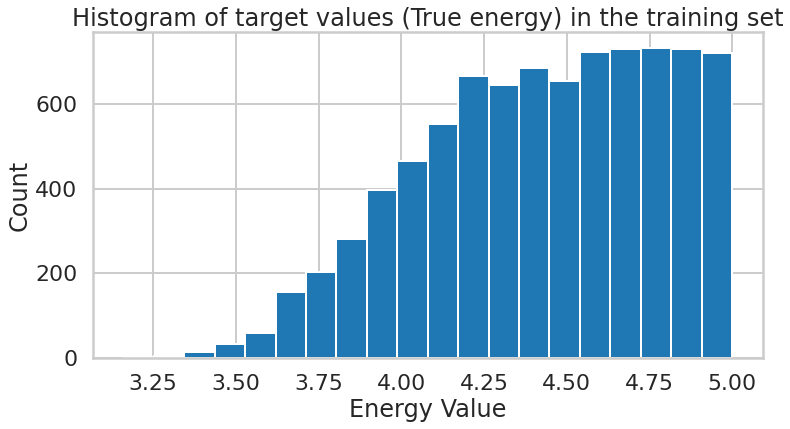

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize = (12, 6))
plt.hist(train_set['True'], bins=20)
plt.title('Histogram of target values (True energy) in the training set')
plt.xlabel('Energy Value')
plt.ylabel('Count')
plt.show()
plt.clf()

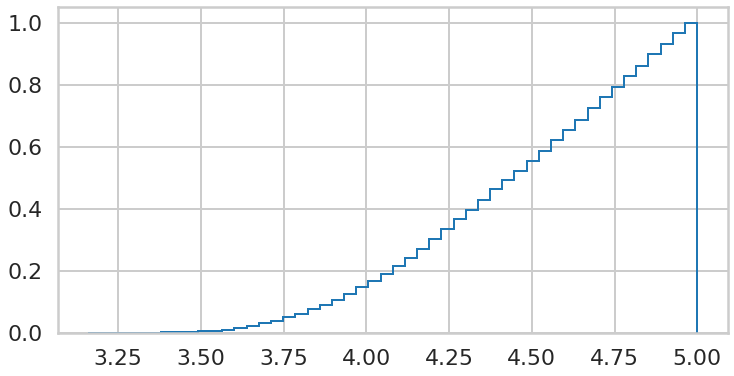

In [13]:
x = train_set['True']

fig, ax = plt.subplots(figsize=(12, 6))
n_bins = 50

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

In [14]:
train_set['True'].describe()

count    8452.000000
mean        4.426156
std         0.364826
min         3.160270
25%         4.165306
50%         4.456997
75%         4.731862
max         4.999615
Name: True, dtype: float64

# Select data; X for attributes, Y for True value targets



In [15]:
X_true = shuffled_df.drop(['True'], axis = 1)
y_true = shuffled_df['True']
#ymodel = shuffle_df.Model
#ymodel = copy1.Model
X_train = train_set.drop(['True'], axis = 1)
X_test = test_set.drop(['True'], axis= 1)
y_train = train_set['True']
y_test = test_set['True']
#y_trainM = train_set.Model
#y_testM = test_set.Model

# Import utilities from scikitlearn; models, evaluation metrics

In [16]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Random Search Cross Validation in Scikit-Learn

we are dealing with a supervised regression machine learning problem.

In [17]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### We will try adjusting the following set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

## Random hyperparameter grid

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [18]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [20]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored